# Project 4 - West Nile Virus Predictor
---

**Contributors: Liyena, Maimunah, Marko and Tiffany**

## EDA

In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import folium
import warnings
import missingno as msno

In [93]:
#load all csv files
url_train = "https://raw.git.generalassemb.ly/munah/Project4/main/assets/train.csv?token=AAAMCJPO3MZ4ERVG4BNQJDTFELMDC"
df_train = pd.read_csv(url_train)

url_spray = "https://raw.git.generalassemb.ly/munah/Project4/main/assets/spray.csv?token=AAAMCJJSZFNB2HQFSYWQGFLFELNHS"
df_spray = pd.read_csv(url_spray)

url_weather = "https://raw.git.generalassemb.ly/munah/Project4/main/assets/weather.csv?token=AAAMCJMRDKUPWNSJL7BFX23FELNM6"
df_weather = pd.read_csv(url_weather)

url_test = "https://raw.git.generalassemb.ly/munah/Project4/main/assets/test.csv?token=AAAMCJI3LA7K6PFBKYZRAFLFEO23S"
df_test = pd.read_csv(url_test)

In [94]:
train_report = sv.analyze(df_train)
train_report.show_html('train.html')

                                             |          | [  0%]   00:00 -> (? left)

Report train.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [95]:
spray_report = sv.analyze(df_spray)
spray_report.show_html('spray.html')

                                             |          | [  0%]   00:00 -> (? left)

Report spray.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [96]:
weather_report = sv.analyze(df_weather)
weather_report.show_html('weather.html')

                                             |          | [  0%]   00:00 -> (? left)

Report weather.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### 1. EDA for train.csv

In [97]:
df_train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [98]:
df_train.shape

(10506, 12)

In [99]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


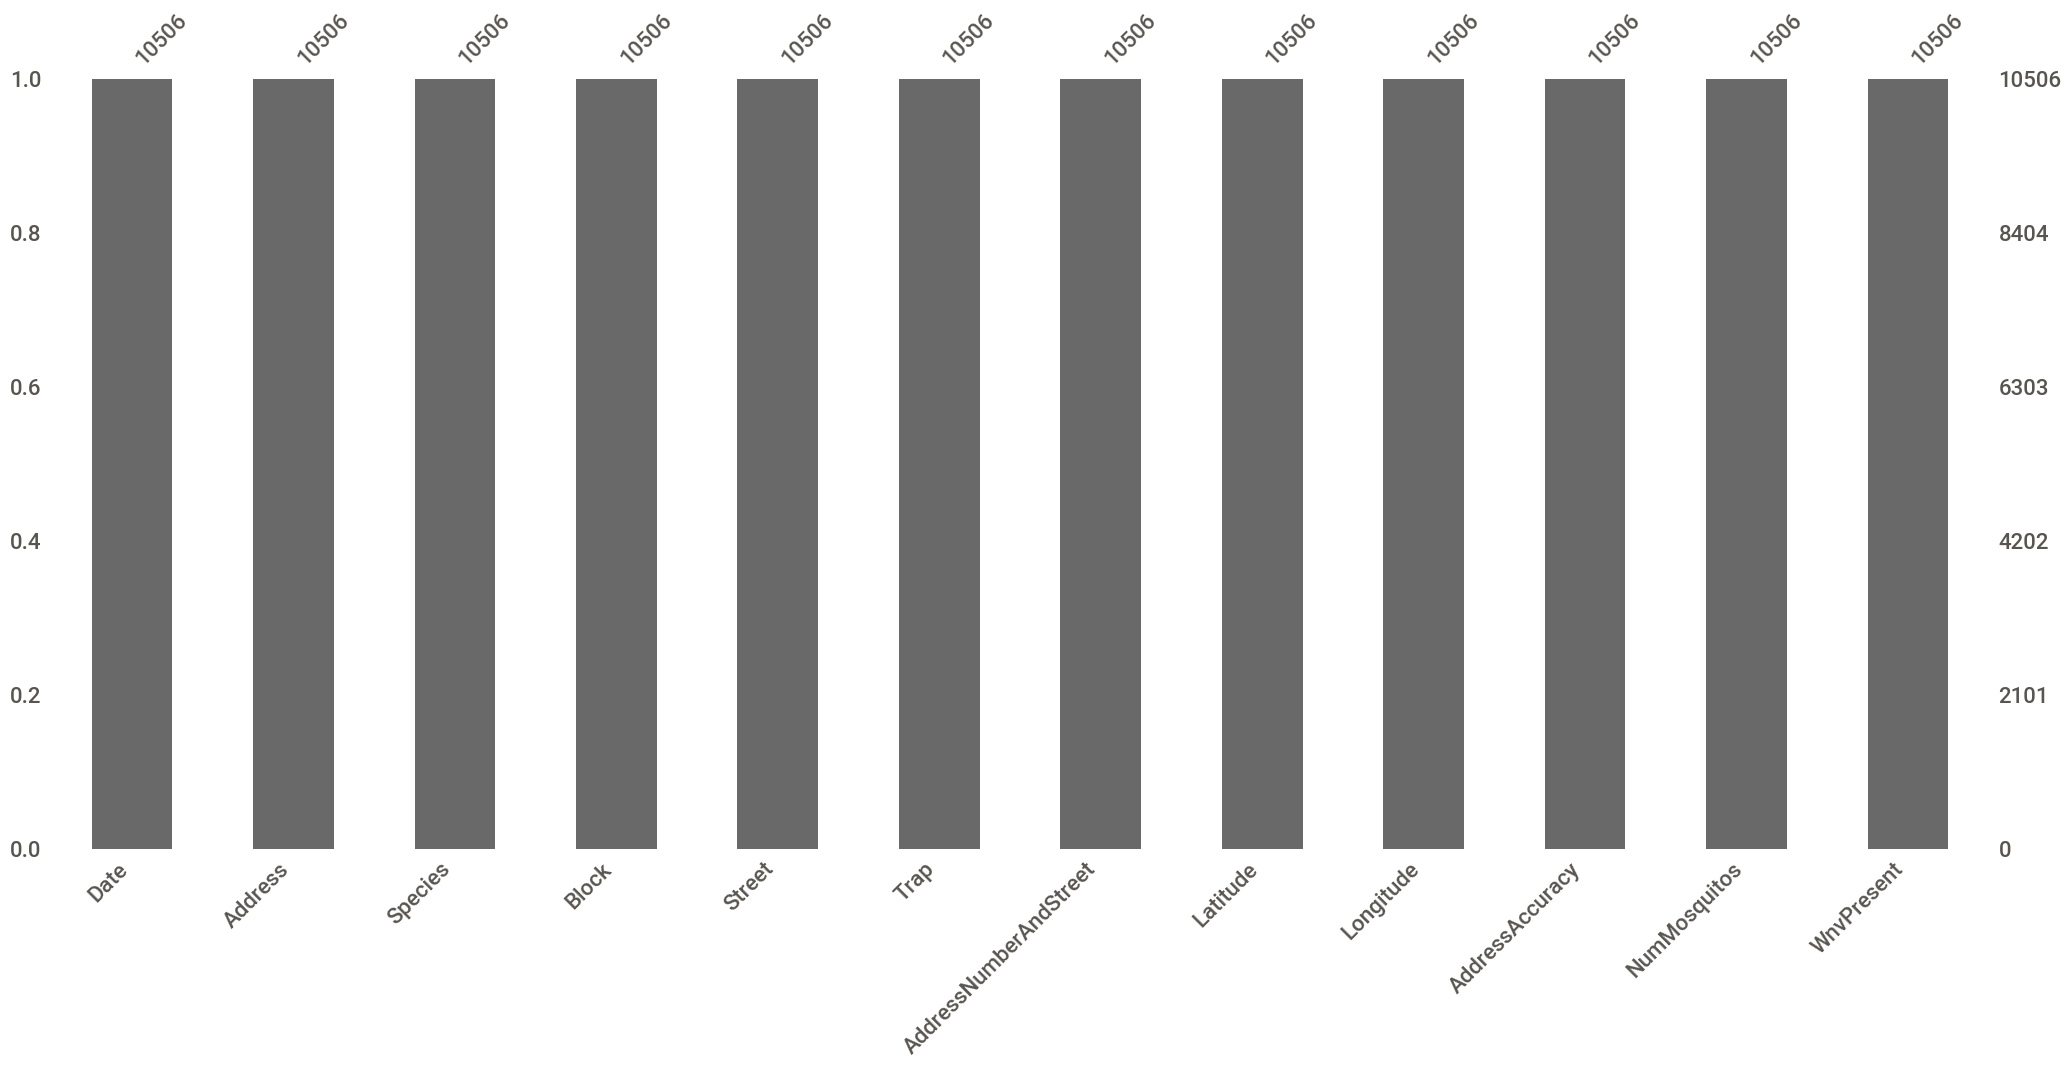

In [100]:
msno.bar(df_train);

In [101]:
df_train['Species'].value_counts()

Species
CULEX PIPIENS/RESTUANS    4752
CULEX RESTUANS            2740
CULEX PIPIENS             2699
CULEX TERRITANS            222
CULEX SALINARIUS            86
CULEX TARSALIS               6
CULEX ERRATICUS              1
Name: count, dtype: int64

In [102]:
df_train['Trap'].value_counts().sort_values()

Trap
T040       2
T237       3
T076       5
T094B      5
T238       7
        ... 
T135     183
T002     185
T138     314
T115     542
T900     750
Name: count, Length: 136, dtype: int64

In [103]:
df_train['Trap'].value_counts().sort_values()

Trap
T040       2
T237       3
T076       5
T094B      5
T238       7
        ... 
T135     183
T002     185
T138     314
T115     542
T900     750
Name: count, Length: 136, dtype: int64

In [104]:
df_train['WnvPresent'].value_counts()

WnvPresent
0    9955
1     551
Name: count, dtype: int64

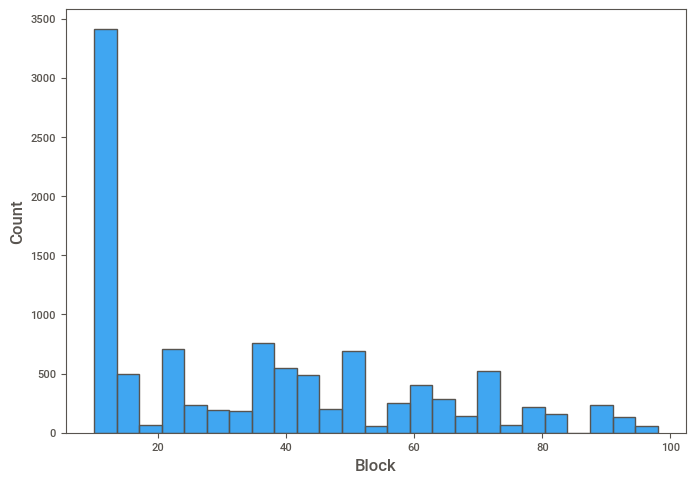

In [105]:
sns.histplot(df_train['Block']);

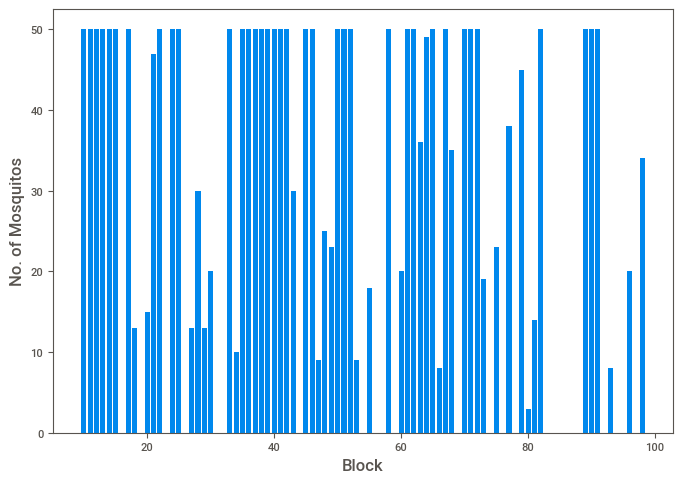

In [106]:
plt.bar(df_train['Block'],df_train['NumMosquitos'])
plt.xlabel('Block')
plt.ylabel('No. of Mosquitos')
plt.show()

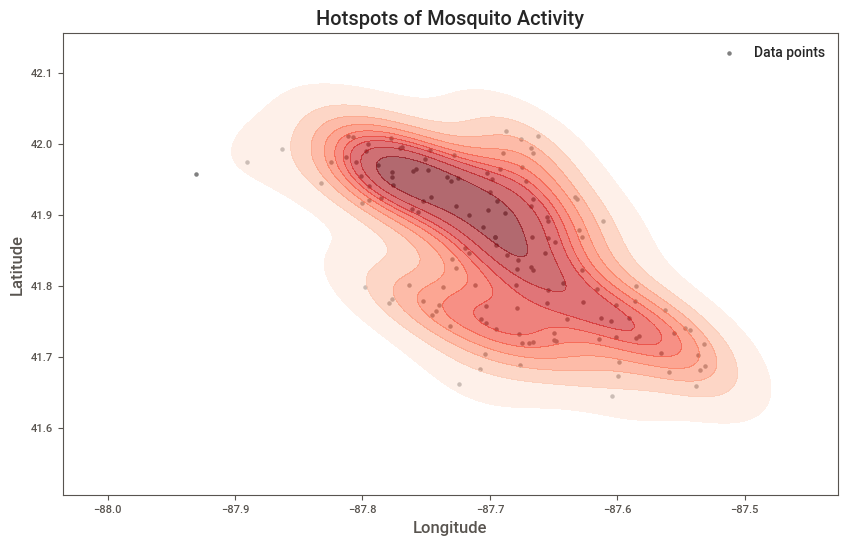

In [107]:
aggregated_data = df_train.groupby(['Latitude', 'Longitude']).agg({'NumMosquitos': 'sum', 'WnvPresent': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))

plt.scatter(aggregated_data['Longitude'], aggregated_data['Latitude'], color='grey', s=5, label='Data points')

sns.kdeplot(x=aggregated_data['Longitude'], y=aggregated_data['Latitude'], cmap='Reds', fill=True, thresh=0.05, alpha=0.6)

plt.title('Hotspots of Mosquito Activity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

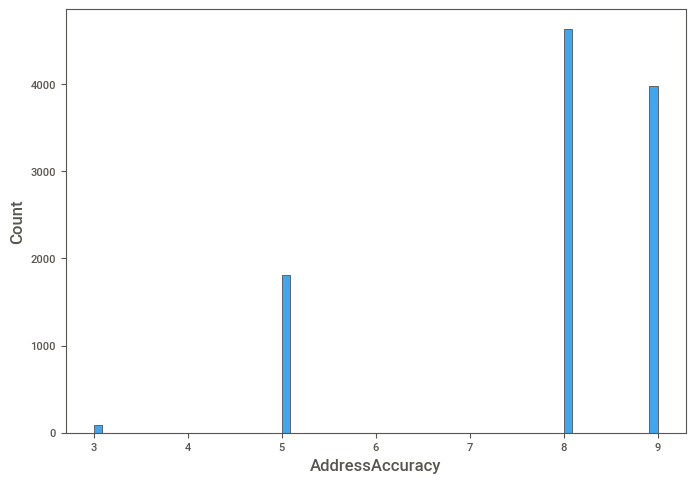

In [108]:
sns.histplot(df_train['AddressAccuracy']);

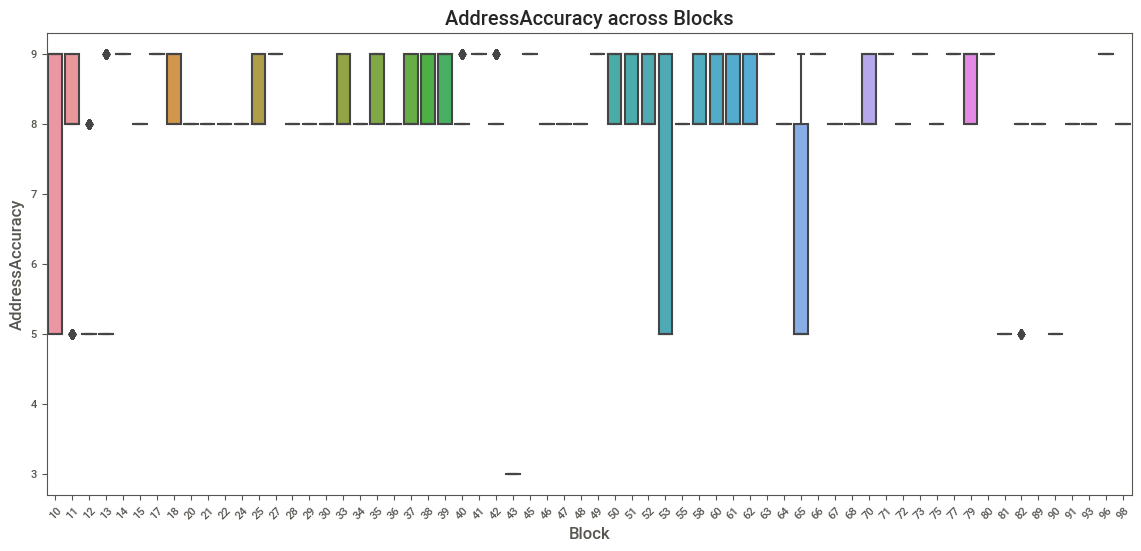

In [109]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='Block', y='AddressAccuracy', data=df_train)
plt.title('AddressAccuracy across Blocks')
plt.xticks(rotation=45)  # To prevent overlap of block numbers on the x-axis
plt.show()


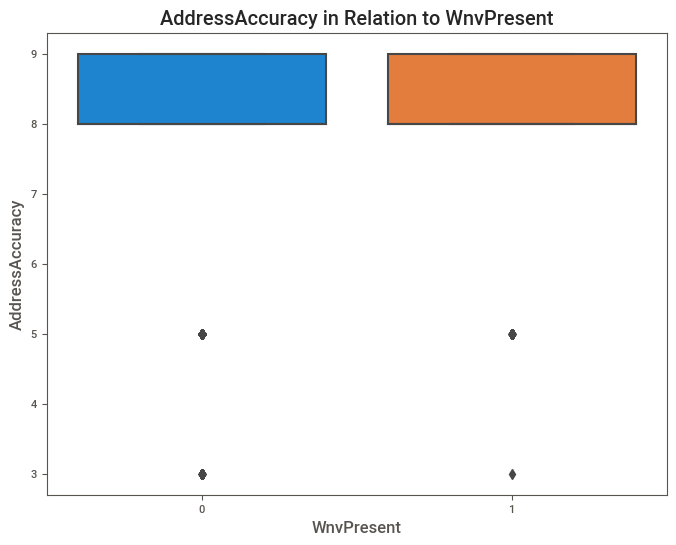

In [110]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='WnvPresent', y='AddressAccuracy', data=df_train)
plt.title('AddressAccuracy in Relation to WnvPresent')
plt.show()


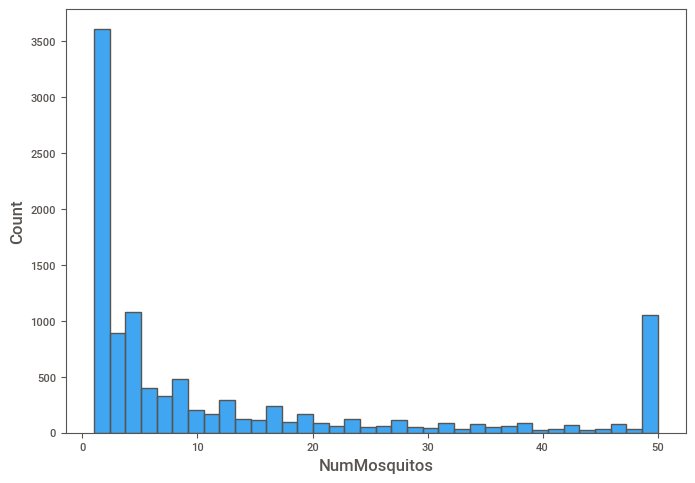

In [111]:
sns.histplot(df_train['NumMosquitos']);

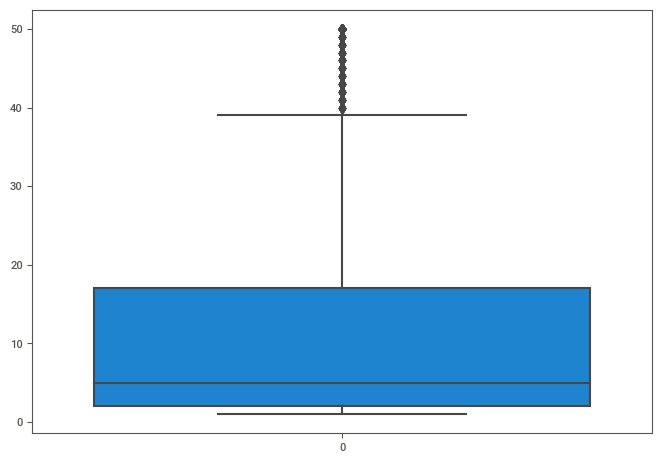

In [112]:
sns.boxplot(df_train['NumMosquitos']);

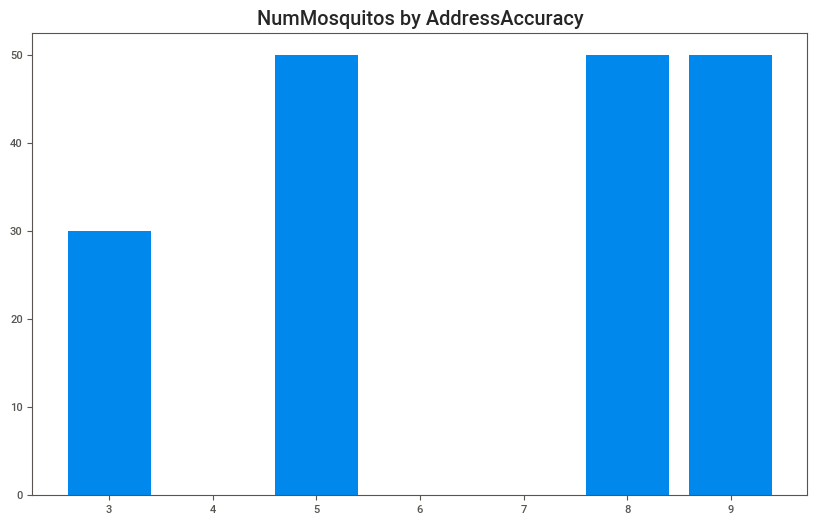

In [113]:
plt.figure(figsize=(10, 6))
plt.bar(df_train['AddressAccuracy'], df_train['NumMosquitos'])
plt.title('NumMosquitos by AddressAccuracy')
plt.show()

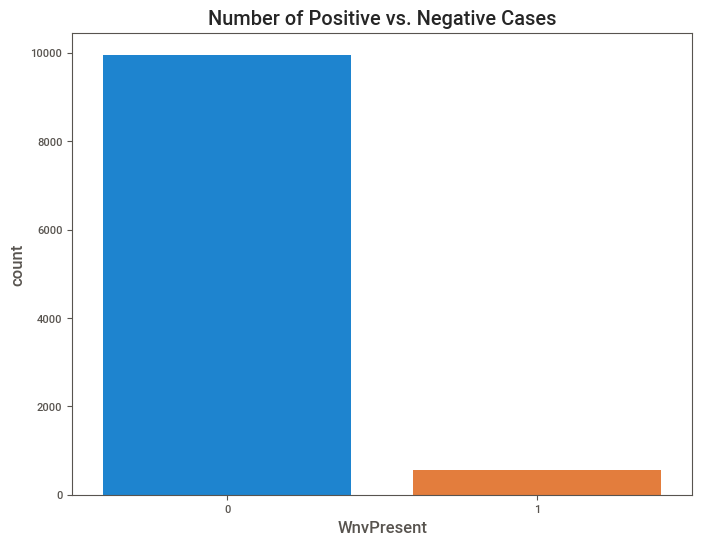

In [114]:
plt.figure(figsize=(8, 6))
sns.countplot(x='WnvPresent', data=df_train)
plt.title('Number of Positive vs. Negative Cases')
plt.show()

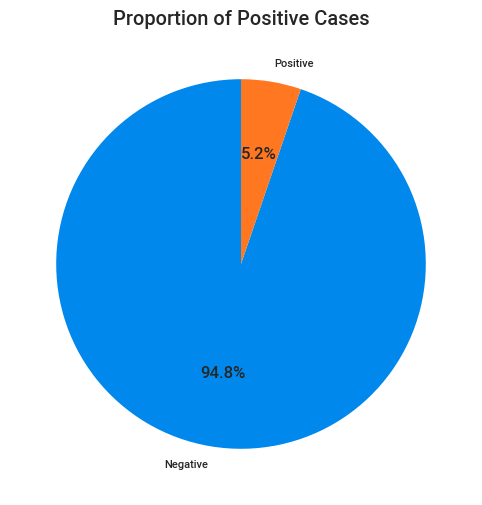

In [115]:
counts = df_train['WnvPresent'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=['Negative', 'Positive'], autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Positive Cases')
plt.show()

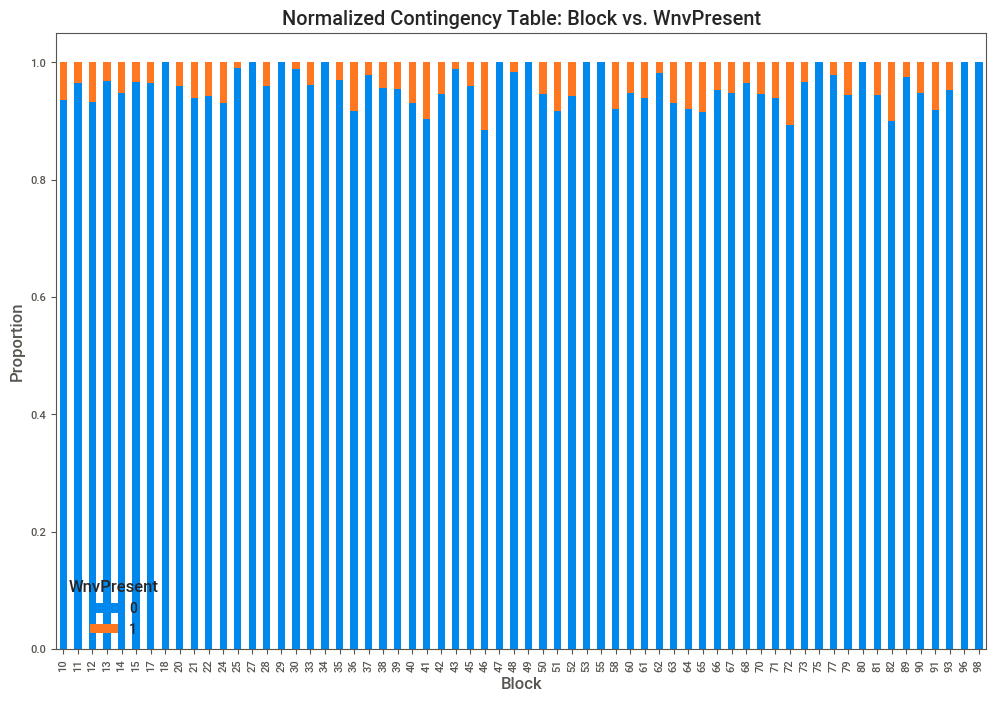

In [116]:
contingency_table = pd.crosstab(df_train['Block'], df_train['WnvPresent'])
normalized_contingency = contingency_table.div(contingency_table.sum(axis=1), axis=0)
normalized_contingency.plot(kind="bar", stacked=True, figsize=(12, 8))
plt.title("Normalized Contingency Table: Block vs. WnvPresent")
plt.ylabel("Proportion")
plt.xlabel("Block")
plt.show()

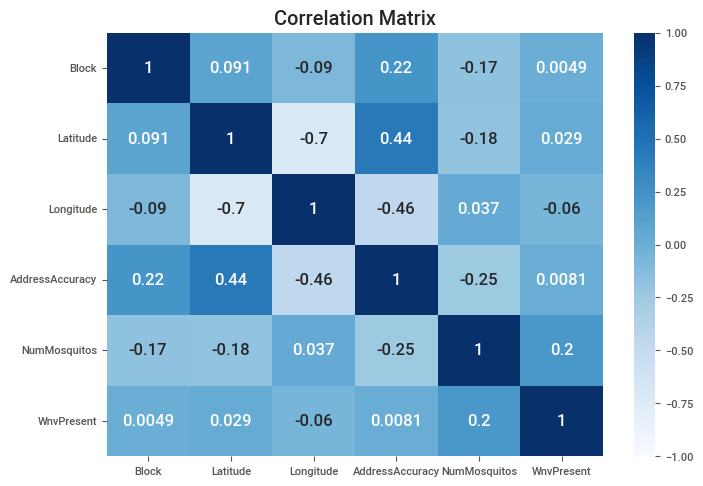

In [117]:
corr = df_train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [118]:
m = folium.Map(location=[41.8781, -87.6298], zoom_start=11)
wnv_data = df_train[df_train['WnvPresent'] == 1]

for index, row in wnv_data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], 
                  tooltip=row['WnvPresent']).add_to(m)

In [119]:
m

### 2. EDA for spray.csv

In [120]:
df_spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [121]:
df_spray.shape

(14835, 4)

In [122]:
df_spray.isnull().sum()

Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

In [123]:
df_spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [124]:
df_spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       14835 non-null  object 
 1   Time       14251 non-null  object 
 2   Latitude   14835 non-null  float64
 3   Longitude  14835 non-null  float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


<Axes: >

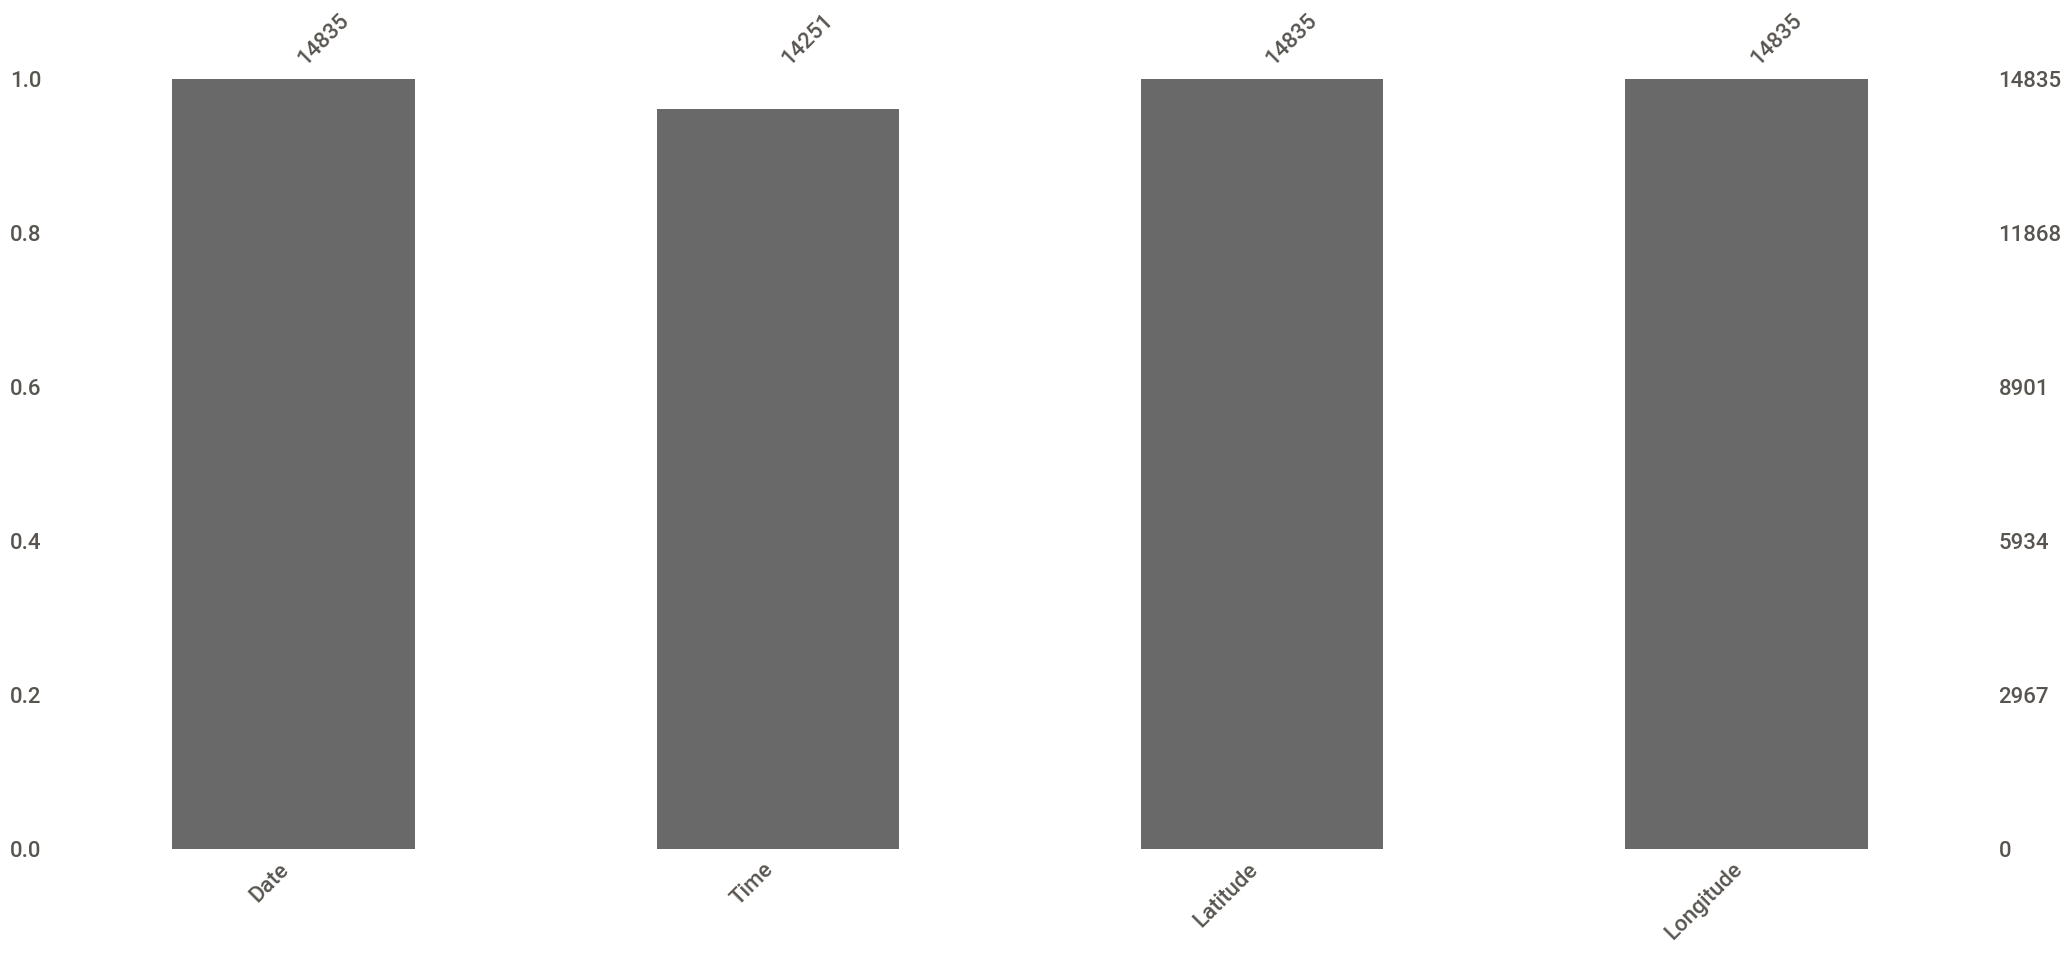

In [125]:
msno.bar(df_spray)

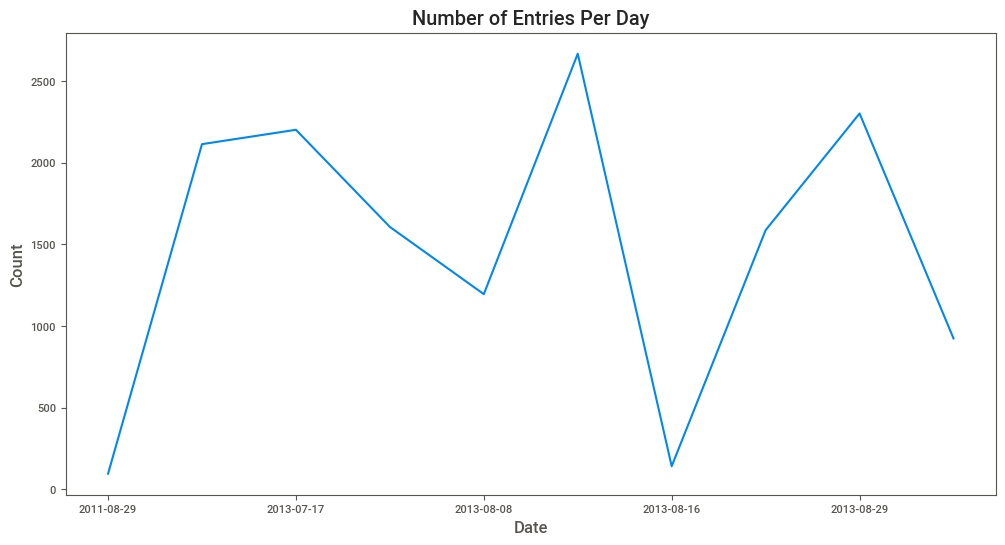

In [126]:
df_spray['Date'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title('Number of Entries Per Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [127]:
s = folium.Map(location=[41.8781, -87.6298], zoom_start=9)
for index, row in df_spray.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(s)

In [128]:
# s

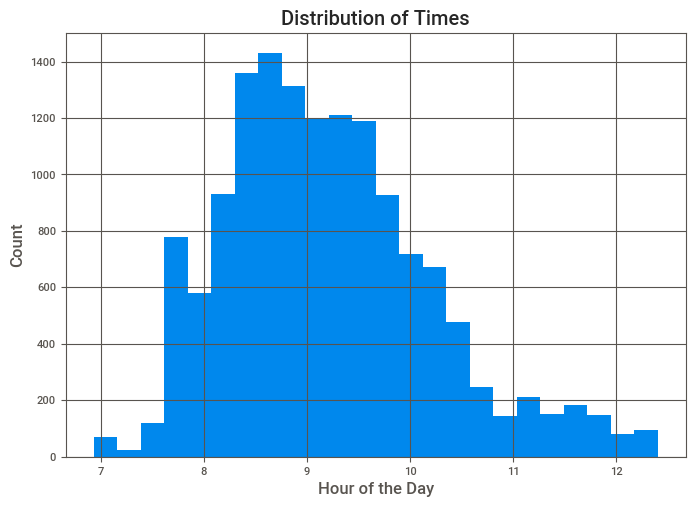

In [129]:
# Convert all non-NA entries in the Time column to strings
df_spray['Time'] = df_spray['Time'].apply(lambda x: str(x) if pd.notna(x) else x)

df_spray['Time'].dropna().str.split(":").apply(lambda x: int(x[0]) + int(x[1])/60).hist(bins=24)
plt.title('Distribution of Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.show()

### 3. EDA for weather.csv

In [130]:
df_weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [131]:
df_weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [132]:
df_weather.describe()

,Station,Tmax,Tmin,DewPoint,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,24.100000,36.000000


In [133]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Date         2944 non-null   object 
 2   Tmax         2944 non-null   int64  
 3   Tmin         2944 non-null   int64  
 4   Tavg         2944 non-null   object 
 5   Depart       2944 non-null   object 
 6   DewPoint     2944 non-null   int64  
 7   WetBulb      2944 non-null   object 
 8   Heat         2944 non-null   object 
 9   Cool         2944 non-null   object 
 10  Sunrise      2944 non-null   object 
 11  Sunset       2944 non-null   object 
 12  CodeSum      2944 non-null   object 
 13  Depth        2944 non-null   object 
 14  Water1       2944 non-null   object 
 15  SnowFall     2944 non-null   object 
 16  PrecipTotal  2944 non-null   object 
 17  StnPressure  2944 non-null   object 
 18  SeaLevel     2944 non-null   object 
 19  Result

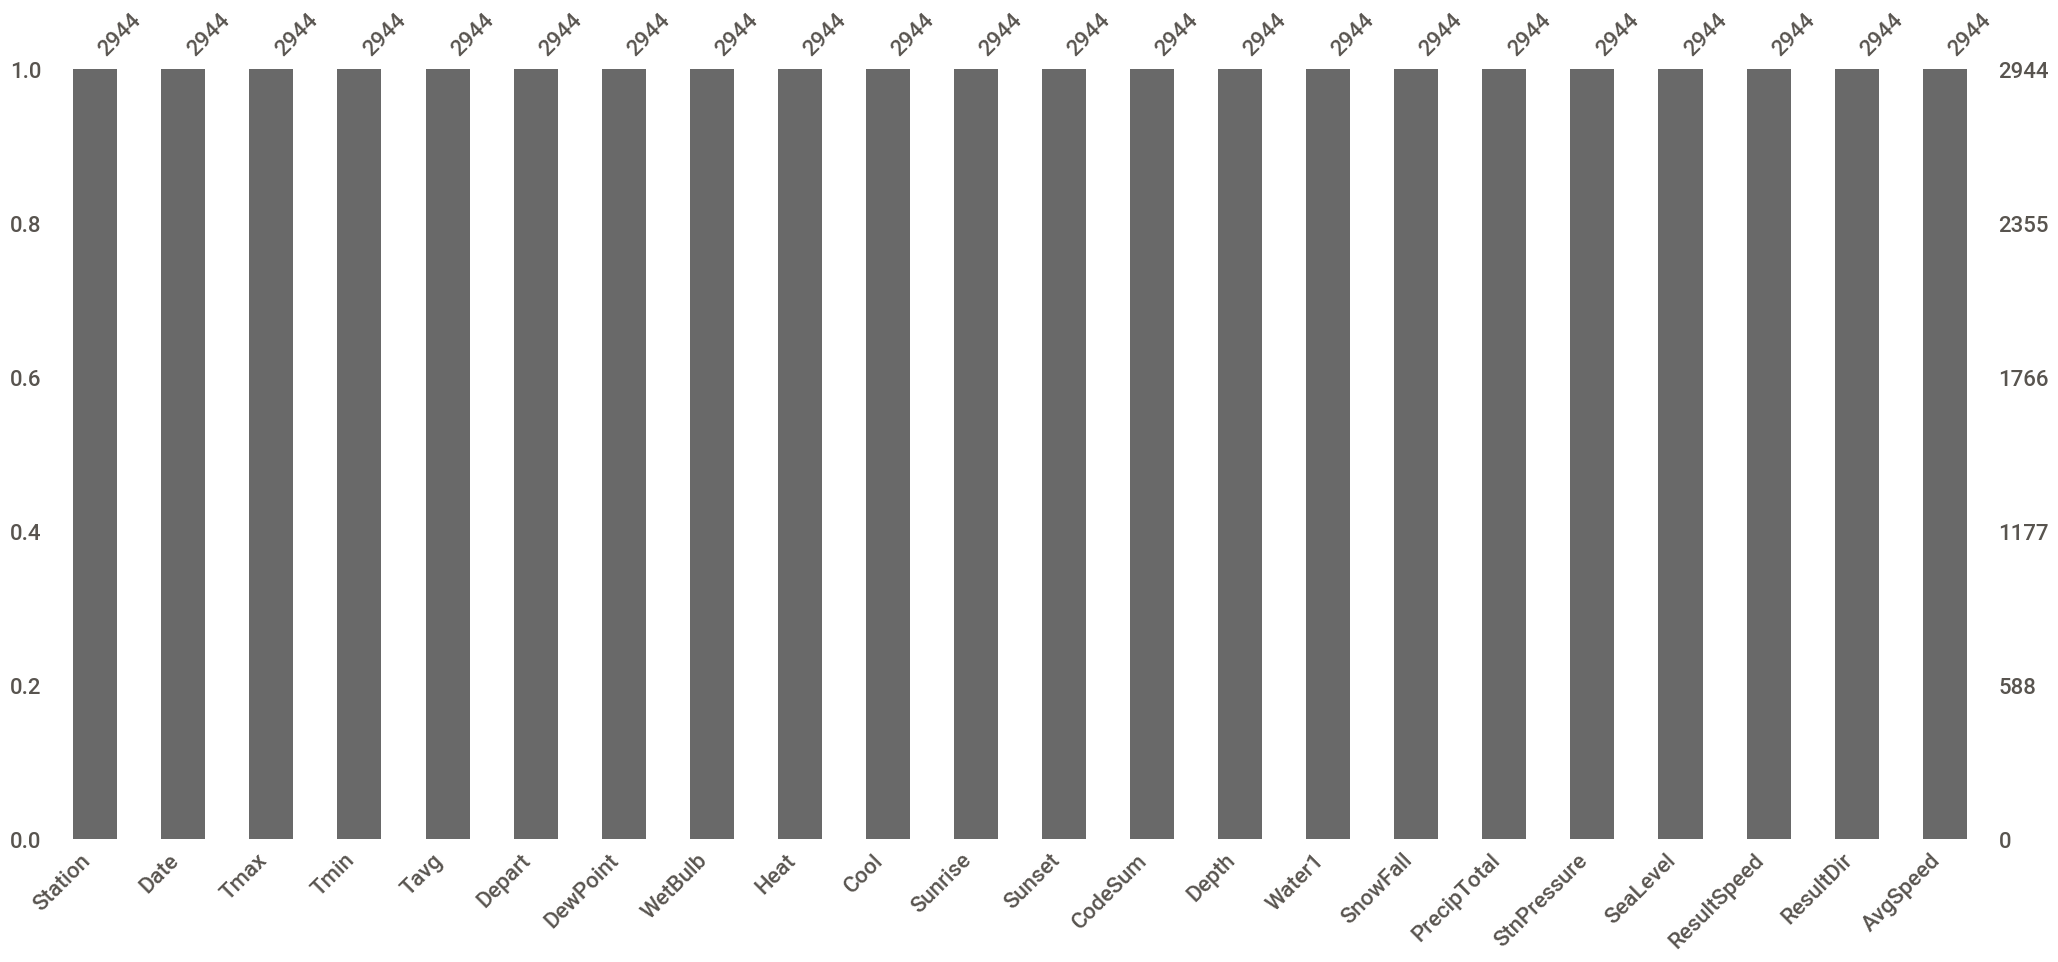

In [134]:
msno.bar(df_weather);

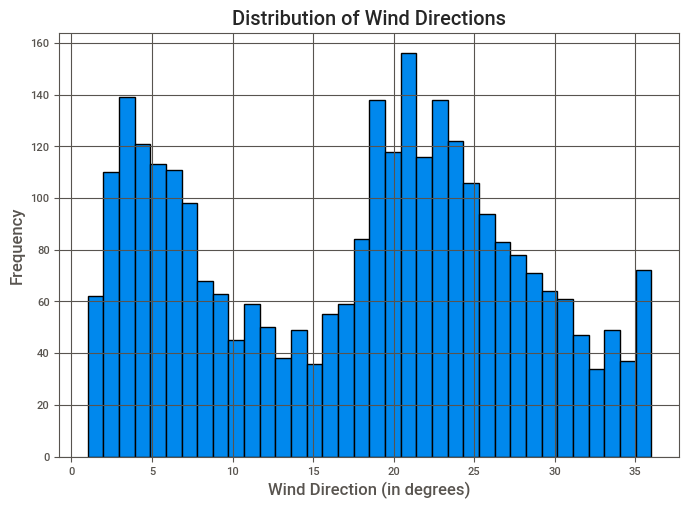

In [135]:
df_weather['ResultDir'].hist(bins=36, edgecolor='black')  # Assuming 360 degrees split into 10-degree bins

plt.title('Distribution of Wind Directions')
plt.xlabel('Wind Direction (in degrees)')
plt.ylabel('Frequency')
plt.show()

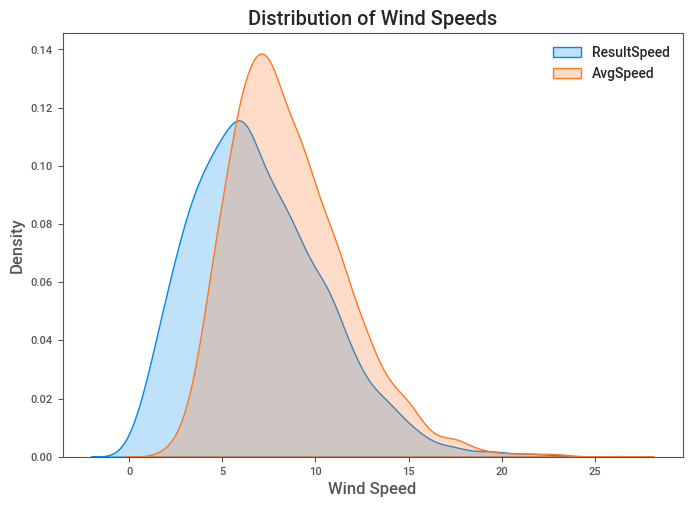

In [136]:
sns.kdeplot(df_weather['ResultSpeed'], label='ResultSpeed', fill=True)

# KDE plot for AvgSpeed. If AvgSpeed is of type object, you might need to convert it to numeric.
df_weather['AvgSpeed'] = pd.to_numeric(df_weather['AvgSpeed'], errors='coerce')
sns.kdeplot(df_weather['AvgSpeed'], label='AvgSpeed', fill=True)

plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed')
plt.ylabel('Density')
plt.legend()
plt.show()

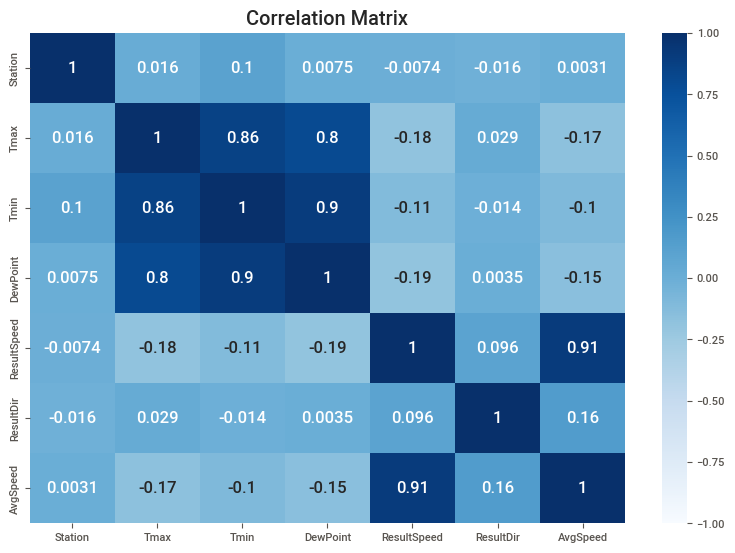

In [137]:
corr = df_weather.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.tight_layout()
plt.title("Correlation Matrix")
plt.show()

In [138]:
df_weather.columns

Index(['Station', 'Date', 'Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Sunrise', 'Sunset', 'CodeSum', 'Depth',
       'Water1', 'SnowFall', 'PrecipTotal', 'StnPressure', 'SeaLevel',
       'ResultSpeed', 'ResultDir', 'AvgSpeed'],
      dtype='object')

In [139]:
duplicated_rows = df_train[df_train.duplicated(keep=False)]
duplicated_rows = duplicated_rows.sort_values(by=list(df_train.columns))

In [140]:
duplicated_rows.head(20)

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
98,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
99,2007-06-26,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,1,0
293,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
295,2007-07-11,"2200 West 113th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,22,W 113TH ST,T086,"2200 W 113TH ST, Chicago, IL",41.688324,-87.676709,8,50,0
350,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
351,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
353,2007-07-11,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX PIPIENS/RESTUANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,50,0
511,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
512,2007-07-18,"3300 West Randolph Street, Chicago, IL 60612, USA",CULEX RESTUANS,33,E RANDOLPH ST,T044,"3300 E RANDOLPH ST, Chicago, IL",41.883284,-87.705085,8,1,0
547,2007-07-18,"3700 118th Street, Chicago, IL 60617, USA",CULEX PIPIENS/RESTUANS,37,E 118TH ST,T212,"3700 E 118TH ST, Chicago, IL",41.680946,-87.535198,8,50,0


In [141]:
# Define the columns to group by and the columns to sum
groupby_cols = ['Address', 'Species', 'Block', 'Street', 'Trap', 'AddressNumberAndStreet', 
                'Latitude', 'Longitude', 'AddressAccuracy', 'WnvPresent']  # Add other columns as needed
sum_cols = ['NumMosquitos']

# Group by the selected columns and aggregate
df_aggregated = df_train.groupby(groupby_cols, as_index=False).agg({
    'NumMosquitos': 'sum'
})


In [142]:
df_aggregated.sort_values('NumMosquitos')

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,WnvPresent,NumMosquitos
240,"3500 West 116th Street, Chicago, IL 60655, USA",CULEX TERRITANS,35,W 116TH ST,T158,"3500 W 116TH ST, Chicago, IL",41.682587,-87.707973,9,0,1
680,"South Cottage Grove Avenue, Chicago, IL, USA",CULEX SALINARIUS,10,S COTTAGE GROVE,T102,"1000 S COTTAGE GROVE, Chicago, IL",41.750498,-87.605294,5,0,1
610,9300 South Doctor Martin Luther King Junior Dr...,CULEX RESTUANS,93,S DR MARTIN LUTHER KING JR DR,T162,"9300 S DR MARTIN LUTHER KING JR DR, Chicago, IL",41.725517,-87.614258,8,0,1
157,"2200 West 51st Street, Chicago, IL 60609, USA",CULEX RESTUANS,22,W 51ST ST,T061,"2200 W 51ST ST, Chicago, IL",41.801179,-87.679447,8,1,1
485,"6400 South Stony Island Avenue, Chicago, IL 60...",CULEX PIPIENS,64,S STONY ISLAND AVE,T077,"6400 S STONY ISLAND AVE, Chicago, IL",41.778748,-87.586427,8,1,1
...,...,...,...,...,...,...,...,...,...,...,...
653,"ORD Terminal 5, O'Hare International Airport, ...",CULEX RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,0,4061
683,"South Doty Avenue, Chicago, IL, USA",CULEX PIPIENS/RESTUANS,12,S DOTY AVE,T115,"1200 S DOTY AVE, Chicago, IL",41.673408,-87.599862,5,0,5139
692,"South Stony Island Avenue, Chicago, IL, USA",CULEX PIPIENS,10,S STONY ISLAND AVE,T138,"1000 S STONY ISLAND AVE, Chicago, IL",41.726465,-87.585413,5,0,6723
651,"ORD Terminal 5, O'Hare International Airport, ...",CULEX PIPIENS/RESTUANS,10,W OHARE AIRPORT,T900,"1000 W OHARE AIRPORT, Chicago, IL",41.974689,-87.890615,9,0,8044


In [143]:
df_weather[['CodeSum']].tail(20)

,CodeSum
2924,
2925,
2926,BR
2927,BR
2928,
2929,
2930,BR
2931,BR HZ
2932,
2933,


In [144]:
# Step 1: Split the strings
split_codes = df_weather['CodeSum'].str.split()

# Step 2: Flatten the list
all_codes = [code for sublist in split_codes for code in sublist]

# Step 3: Get unique codes
weather_codes = set(all_codes)

In [145]:
weather_codes

{'BCFG',
 'BR',
 'DZ',
 'FG',
 'FG+',
 'FU',
 'GR',
 'HZ',
 'MIFG',
 'RA',
 'SN',
 'SQ',
 'TS',
 'TSRA',
 'VCFG',
 'VCTS'}

In [146]:
for code in weather_codes:
    df_weather[code] = df_weather['CodeSum'].apply(lambda x: 1 if code in x else 0)

In [147]:
df_weather

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,BR,FG+,FG,TS,TSRA,RA,SQ,GR,BCFG,DZ
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,0,0,0,0,0,0,0,0,0,0
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,1,0,0,0,0,0,0,0,0,0
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,1,0,0,0,0,0,0,0,0,0
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45,M,34,42,20,0,...,0,0,0,0,0,0,0,0,0,0
2940,1,2014-10-30,51,32,42,-4,34,40,23,0,...,0,0,0,0,0,0,0,0,0,0
2941,2,2014-10-30,53,37,45,M,35,42,20,0,...,0,0,0,0,0,1,0,0,0,0
2942,1,2014-10-31,47,33,40,-6,25,33,25,0,...,0,0,0,0,0,1,0,0,0,0


## Modelling